# **DESCRIPTION DU JEU DE DONNEES**

**aisles:**

1. aisle_id: Identifiant unique de l'allée. (clé primaire)
2. aisle: Nom de l'allée

**departments:**

1. department_id: Identifiant unique du rayon. (clé primaire)
2. department: Nom du rayon

**order_products:**

1. order_id: Identifiant de la commande. (clé étrangère vers orders)
2. product_id: Identifiant du produit. (clé étrangère vers products)
3. add_to_cart_order: Ordre d'ajout du produit au panier.
4. reordered: Indique si le produit a déjà été commandé (1 = oui, 0 = non).

**orders:**

1. order_id: Identifiant unique de la commande. (clé primaire)
2. user_id: Identifiant unique du client.
3. eval_set: Ensemble d'évaluation de la command
4. order_number: Numéro de la commande pour un client donné.
5. order_dow: Jour de la semaine de la commande (0 = lundi, 1 = mardi, etc.).
6. order_hour_of_day: Heure de la commande.
7. days_since_prior_order: Jours depuis la dernière commande du client.

**products:**

1. product_id: Identifiant unique du produit. (clé primaire)
2. product_name: Nom du produit.
3. aisle_id: Identifiant de l'allée du produit. (clé étrangère vers aisles)
4. department_id: Identifiant du rayon du produit. (clé étrangère vers departments)

# EXPLORATION DES DONNEES

In [1]:
import pandas as pandas
import numpy as numpy
import matplotlib.pyplot as plt
import seaborn as sns

#### aisles

In [2]:

#importer le ficher aisles.csv
aisles = pandas.read_csv('aisles.csv')
aisles.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [3]:
#aisle duplicated
aisles.duplicated().sum()

np.int64(0)

In [4]:
# valeur null
aisles.isnull().sum().sum()

np.int64(0)

#### departments

In [5]:
#importer le ficher departements.csv
departments = pandas.read_csv('departments.csv')
departments.head()


,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [6]:
# duplicated
departments.duplicated().sum()

np.int64(0)

In [7]:
# valeur null
departments.isnull().sum().sum()

np.int64(0)

In [8]:
#infos
departments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 468.0+ bytes


#### orders products

In [9]:
#importer le ficher order_products.csv
orders_products = pandas.read_csv('order_products.csv')
orders_products.head()


,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [10]:
#duplicated
orders_products.duplicated().sum()

np.int64(0)

In [11]:
#infos
orders_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32434489 entries, 0 to 32434488
Data columns (total 4 columns):
 #   Column             Dtype
---  ------             -----
 0   order_id           int64
 1   product_id         int64
 2   add_to_cart_order  int64
 3   reordered          int64
dtypes: int64(4)
memory usage: 989.8 MB


#### orders

In [12]:
#importer le ficher orders.csv
orders = pandas.read_csv('orders.csv')
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [13]:
orders['days_since_prior_order'].min()

np.float64(0.0)

In [14]:
#NaN values
null = orders.isnull().sum().sum()
print(null)

206209


In [15]:
#pourcentage de valeur manquante
percent_missing = null * 100 / len(orders)
print(percent_missing)

6.027594185817766


#### Products

In [16]:
# #importer le ficher products.csv
products = pandas.read_csv('products.csv')
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [17]:
# #duplicated
products.duplicated().sum()

np.int64(0)

In [18]:
# #infos
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49688 entries, 0 to 49687
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49688 non-null  int64 
 1   product_name   49688 non-null  object
 2   aisle_id       49688 non-null  int64 
 3   department_id  49688 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


# NETTOYAGE

In [19]:
#yes==0 and no==1 for reordered
orders_products['reordered'] = orders_products['reordered'].replace({1: 'yes', 0: 'no'})
orders_products.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,yes
1,2,28985,2,yes
2,2,9327,3,no
3,2,45918,4,yes
4,2,30035,5,no


In [20]:
#maping day on order_dow
day = {0: 'Monday',1: 'Tuesday',2: 'Wednesday',3: 'Thusrday',4: 'Friday',5: 'Saturday',6: 'Sunday'}
orders['day'] = orders['order_dow'].map(day)
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,day
0,2539329,1,prior,1,2,8,NaN,Wednesday
1,2398795,1,prior,2,3,7,15.0,Thusrday
2,473747,1,prior,3,3,12,21.0,Thusrday
3,2254736,1,prior,4,4,7,29.0,Friday
4,431534,1,prior,5,4,15,28.0,Friday


In [21]:
#maping period on order_hour_of_day
def period(hour):
    if 6 < hour <= 12:
        return 'Morning'
    elif 12 < hour <= 18:
        return 'Afternoon'
    elif 18 < hour <= 24:
        return 'Evening'
    else:
        return 'Night'

orders['period'] = orders['order_hour_of_day'].apply(period)
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,day,period
0,2539329,1,prior,1,2,8,NaN,Wednesday,Morning
1,2398795,1,prior,2,3,7,15.0,Thusrday,Morning
2,473747,1,prior,3,3,12,21.0,Thusrday,Morning
3,2254736,1,prior,4,4,7,29.0,Friday,Morning
4,431534,1,prior,5,4,15,28.0,Friday,Afternoon


In [22]:
# days_since_prior_order variance
var = orders['days_since_prior_order'].var()
var

#days_since_prior_order mean
meann_days = orders['days_since_prior_order'].mean()
meann_days

#days_since_prior_order median
medd_days = orders['days_since_prior_order'].median()
medd_days

print(f'The mean is {meann_days} and the median is {medd_days} and variance is {var}')

The mean is 11.114836226863012 and the median is 7.0 and variance is 84.7639973032906


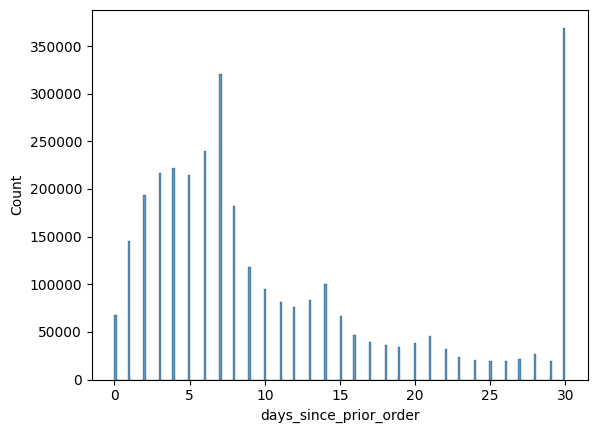

In [23]:
#days_since_prior_order histplot

sns.histplot(orders['days_since_prior_order'], kde=False)
plt.show()

In [24]:
#fill days_since_prior_order verification
days_since_prior = orders['days_since_prior_order'].copy()

mean_days = days_since_prior.mean()
med_days = days_since_prior.median()
var_days  = days_since_prior.var()

days_mean = days_since_prior.fillna(mean_days)
mean_after_mean = days_mean.mean()
med_after_mean = days_mean.median()
var_after_mean = days_mean.var()

days_median = days_since_prior.fillna(med_days)
mean_after_median = days_median.mean()
med_after_median = days_median.median()
var_after_median = days_median.var()

days_zero = days_since_prior.fillna(0)
mean_after_zero_fill = days_zero.mean()
med_after_zero_fill = days_zero.median()
var_after_zero_fill = days_zero.var()

print(f'Variance after replace by the mean: {var_after_mean}')
print(f'mean after replace by the mean: {mean_after_mean}')
print(f'median after replace by the mean: {med_after_mean}')

print(f'Variance après remplacement par la median: {var_after_median}')
print(f'mean after replace by median: {mean_after_median}')
print(f'median après remplacement par la median: {med_after_median}')

print(f'median after replace by zéro: {med_after_zero_fill}')
print(f'Variance after replace by zéro: {var_after_zero_fill}')
print(f'mean after replace by zéro: {mean_after_zero_fill}')


Variance after replace by the mean: 79.65476603671638
mean after replace by the mean: 11.114836226863002
median after replace by the mean: 8.0
Variance après remplacement par la median: 80.6138344484177
mean after replace by median: 10.866810597696695
median après remplacement par la median: 7.0
median after replace by zéro: 7.0
Variance after replace by zéro: 86.6523902060783
mean after replace by zéro: 10.44487900468945


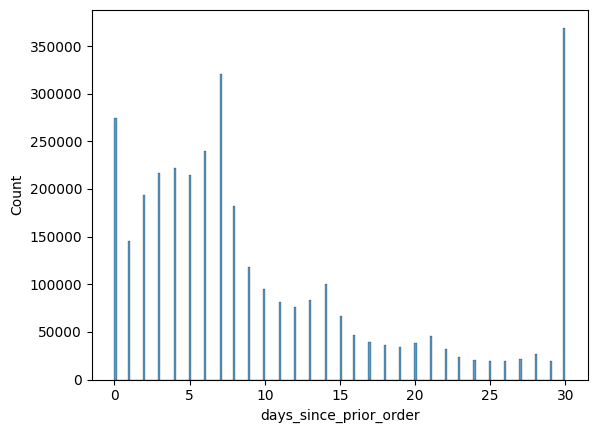

In [25]:
sns.histplot(days_zero, kde=False)
plt.show()

In [26]:
orders.isnull().sum().sum()

np.int64(206209)

In [27]:
#fill days_since_prior_order by 0
orders['days_since_prior_order'] = orders['days_since_prior_order'].fillna(days_zero)
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,day,period
0,2539329,1,prior,1,2,8,0.0,Wednesday,Morning
1,2398795,1,prior,2,3,7,15.0,Thusrday,Morning
2,473747,1,prior,3,3,12,21.0,Thusrday,Morning
3,2254736,1,prior,4,4,7,29.0,Friday,Morning
4,431534,1,prior,5,4,15,28.0,Friday,Afternoon


In [28]:
# #NaN values
orders.isnull().sum().sum()

np.int64(0)

#### merge data

In [29]:
#merge orders_products with orders
order2_products = orders_products.merge(orders, on='order_id', how='inner')
order2_products.head()

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,day,period
0,2,33120,1,yes,202279,prior,3,5,9,8.0,Saturday,Morning
1,2,28985,2,yes,202279,prior,3,5,9,8.0,Saturday,Morning
2,2,9327,3,no,202279,prior,3,5,9,8.0,Saturday,Morning
3,2,45918,4,yes,202279,prior,3,5,9,8.0,Saturday,Morning
4,2,30035,5,no,202279,prior,3,5,9,8.0,Saturday,Morning


In [30]:
#verify shape
print(orders.shape)
print(orders_products.shape)
print(order2_products.shape)


(3421083, 9)
(32434489, 4)
(32434489, 12)


In [31]:
#merge order2_products with products
order2_products_products = order2_products.merge(products, on='product_id', how='left')
order2_products_products.head()
print(products.shape)
print(order2_products.shape)
print(order2_products_products.shape)


(49688, 4)
(32434489, 12)
(32434489, 15)


In [32]:
#merge order2_products_products with aisles
order2_products_products_aisles = order2_products_products.merge(aisles, on ='aisle_id', how='left')
order2_products_products_aisles.head()
print(aisles.shape)
print(order2_products_products.shape)
print(order2_products_products_aisles.shape)

(134, 2)
(32434489, 15)
(32434489, 16)


In [33]:
#final dataset include all dataset
final = order2_products_products_aisles.merge(departments, on ='department_id', how='left')
final.head()
print(departments.shape)
print(order2_products_products_aisles.shape)
print(final.shape)

(21, 2)
(32434489, 16)
(32434489, 17)


In [34]:
#display final dataset
final.head()

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,day,period,product_name,aisle_id,department_id,aisle,department
0,2,33120,1,yes,202279,prior,3,5,9,8.0,Saturday,Morning,Organic Egg Whites,86,16,eggs,dairy eggs
1,2,28985,2,yes,202279,prior,3,5,9,8.0,Saturday,Morning,Michigan Organic Kale,83,4,fresh vegetables,produce
2,2,9327,3,no,202279,prior,3,5,9,8.0,Saturday,Morning,Garlic Powder,104,13,spices seasonings,pantry
3,2,45918,4,yes,202279,prior,3,5,9,8.0,Saturday,Morning,Coconut Butter,19,13,oils vinegars,pantry
4,2,30035,5,no,202279,prior,3,5,9,8.0,Saturday,Morning,Natural Sweetener,17,13,baking ingredients,pantry


In [35]:
#final verify existing NaN values
final.isnull().sum().sum()

np.int64(0)

In [36]:
#download final dataset to csv file
# final.to_csv('finalok.csv', index=False)

# VISUALISATION

#### <h3><center><b><font color='green'>what is the total order ?</font></b></center></h3>

In [37]:
# #total commande
total_commande = final['order_id'].count()
print(f"Total Commande: {total_commande}")

Total Commande: 32434489


#### <h3><center><b><font color='green'>what is the total unique clients ?</font></b></center></h3>

In [38]:
#take unique client
Unique_clients = final['user_id'].nunique()
print(f"Unique clients: {Unique_clients}")

Unique clients: 206209


#### <h3><center><b><font color='green'>When do people order ?</font></b></center></h3>

**Daily command**

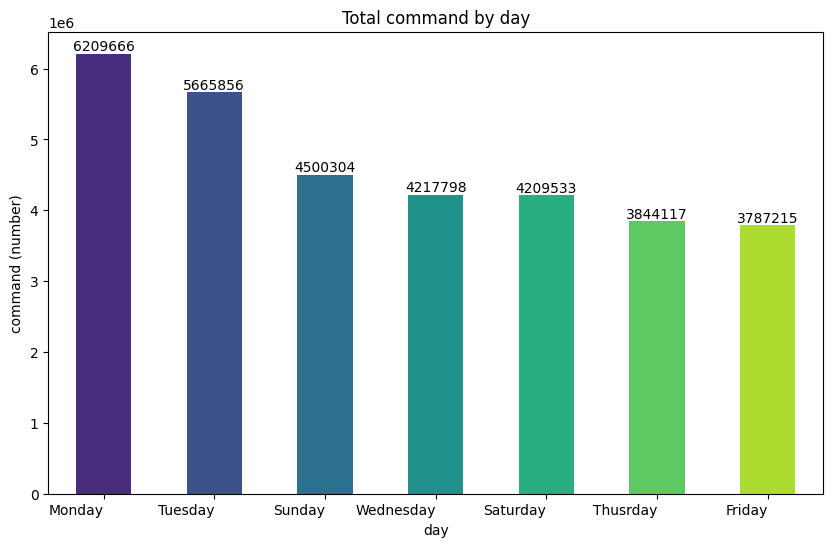

In [39]:
# day avec le plus de commande
max_order_day = final.groupby('day')['order_id'].count().nlargest(7)

#graphique à barres
plt.figure(figsize=(10, 6))
bars = max_order_day.plot(kind='bar', color=sns.color_palette('viridis', len(max_order_day)))
plt.title('Total command by day')
plt.xlabel('day')
plt.ylabel('command (number)')
plt.xticks(rotation =0, ha='right')  

#étiquettes
for bar in bars.patches:
    yval = bar.get_height()
    barspace = bar.width=(0.1)
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 0), ha='center', va='bottom')

plt.show()

there are many more orders at the beginning of the week

**Period command**

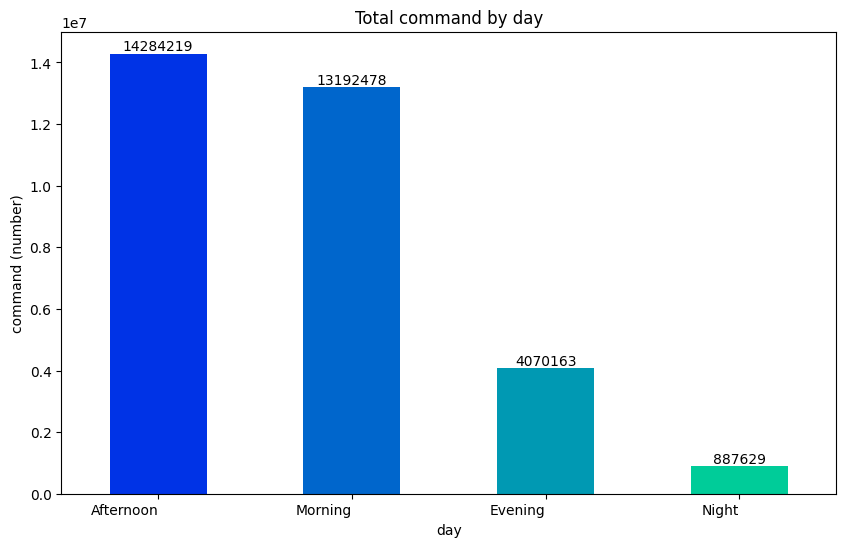

In [40]:
#moment de la journéée avec le plus de vente moyenne

# day avec le plus de commande
period = final.groupby('period')['order_id'].count().nlargest()

#graphique à barres
plt.figure(figsize=(10, 6))
bars = period.plot(kind='bar', color=sns.color_palette('winter', len(period)))
plt.title('Total command by day')
plt.xlabel('day')
plt.ylabel('command (number)')
plt.xticks(rotation =0, ha='right')  

#étiquettes
for bar in bars.patches:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 0), ha='center', va='bottom')

plt.show()

most orders are placed between morning and afternoon

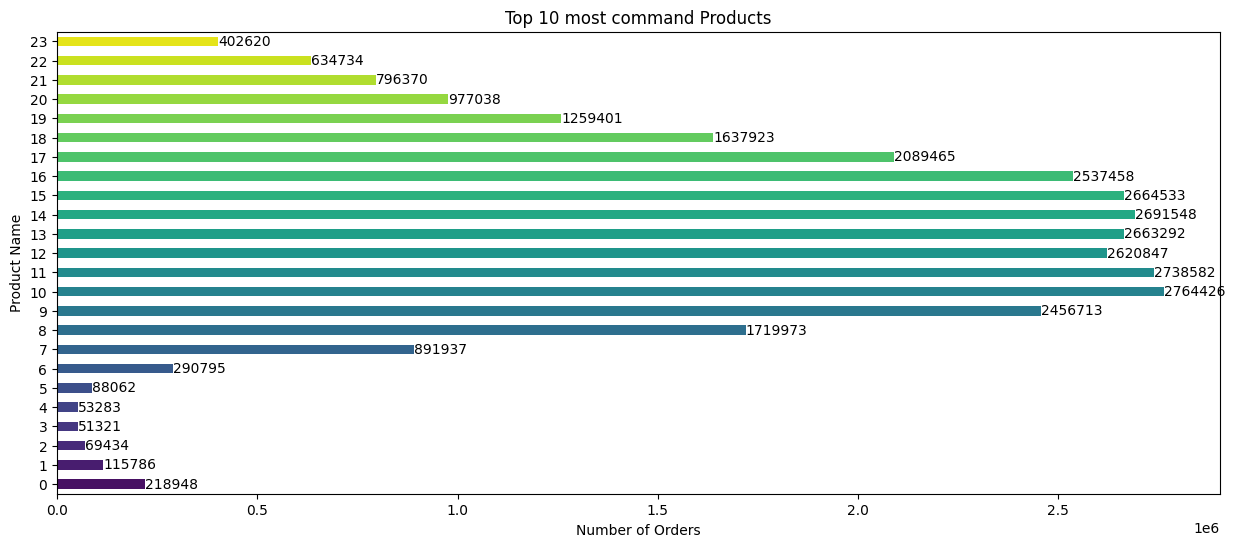

In [41]:
#moment de la journéée avec le plus de vente moyenne

# day avec le plus de commande
period = final.groupby('order_hour_of_day')['order_id'].count()

#barhchat
plt.figure(figsize=(15, 6))
bars = period.plot(kind='barh', color=sns.color_palette('viridis', len(period))) 
plt.title('Top 10 most command Products')
plt.xlabel('Number of Orders')  
plt.ylabel('Product Name')

#labels
for bar in bars.patches:
    xval = bar.get_width() 
    plt.text(xval, bar.get_y() + bar.get_height()/2, round(xval, 0), ha='left', va='center') 
plt.show()

orders start to fall off at 6 a.m., with rapid growth until 10 a.m. orders stabilize until 3 p.m., then fall off again just as quickly until 00 a.m.

#### <h3><center><b><font color='green'>How many items do people buy ?</font></b></center></h3>

In [42]:
avg_products = final.groupby('user_id')['product_id'].count().reset_index()
avg_products.head()

,user_id,product_id
0,1,59
1,2,195
2,3,88
3,4,18
4,5,37


In [43]:
products_order = final.groupby('order_id')['product_id'].count().reset_index()
mosts_prod = products_order.loc[products_order['product_id'].idxmax()]
low_prod = products_order.loc[products_order['product_id'].idxmin()]

In [44]:
print(f"Nombre moyen d'articles par client : {avg_products['product_id'].mean()}")
print(f"La commande avec le plus d'articles est la commande {mosts_prod['order_id']} avec {mosts_prod['product_id']} articles")
print(f"La commande avec le moins d'articles est la commande {low_prod['order_id']} avec {low_prod['product_id']} articles")

Nombre moyen d'articles par client : 157.28939571017753
La commande avec le plus d'articles est la commande 1564244 avec 145 articles
La commande avec le moins d'articles est la commande 8 avec 1 articles


#### <h3><center><b><font color='green'>What items sell the most ?</font></b></center></h3>

**total command**

In [45]:
#total command
total_command = final['order_id'].count()
total_command

np.int64(32434489)

**top 10  command products**

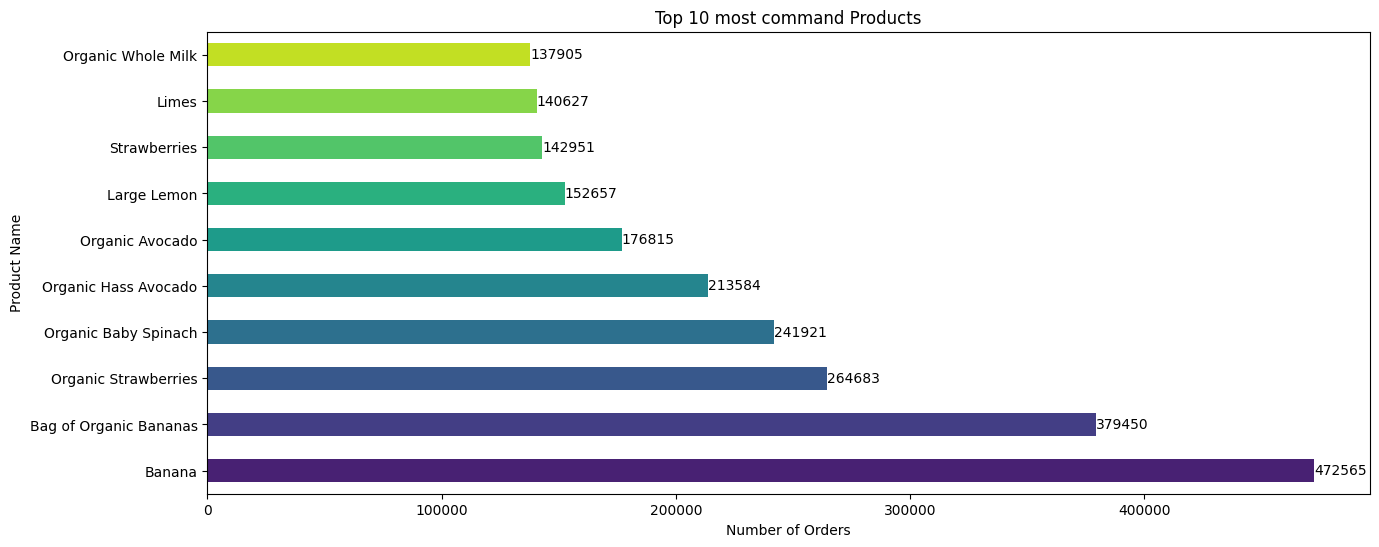

In [46]:
#top 5 productq
most_sell_product = final.groupby('product_name')['order_id'].count().nlargest(10)

#barhchat
plt.figure(figsize=(15, 6))
bars = most_sell_product.plot(kind='barh', color=sns.color_palette('viridis', len(most_sell_product))) 
plt.title('Top 10 most command Products')
plt.xlabel('Number of Orders')  
plt.ylabel('Product Name')

#labels
for bar in bars.patches:
    xval = bar.get_width() 
    plt.text(xval, bar.get_y() + bar.get_height()/2, round(xval, 0), ha='left', va='center') 
plt.show()

`Banana` et `Bag of organic Bananas` sont les produit les plus commandés avec respectivement 1.4% et 1.2% des commandes.

 **last 10 command products**

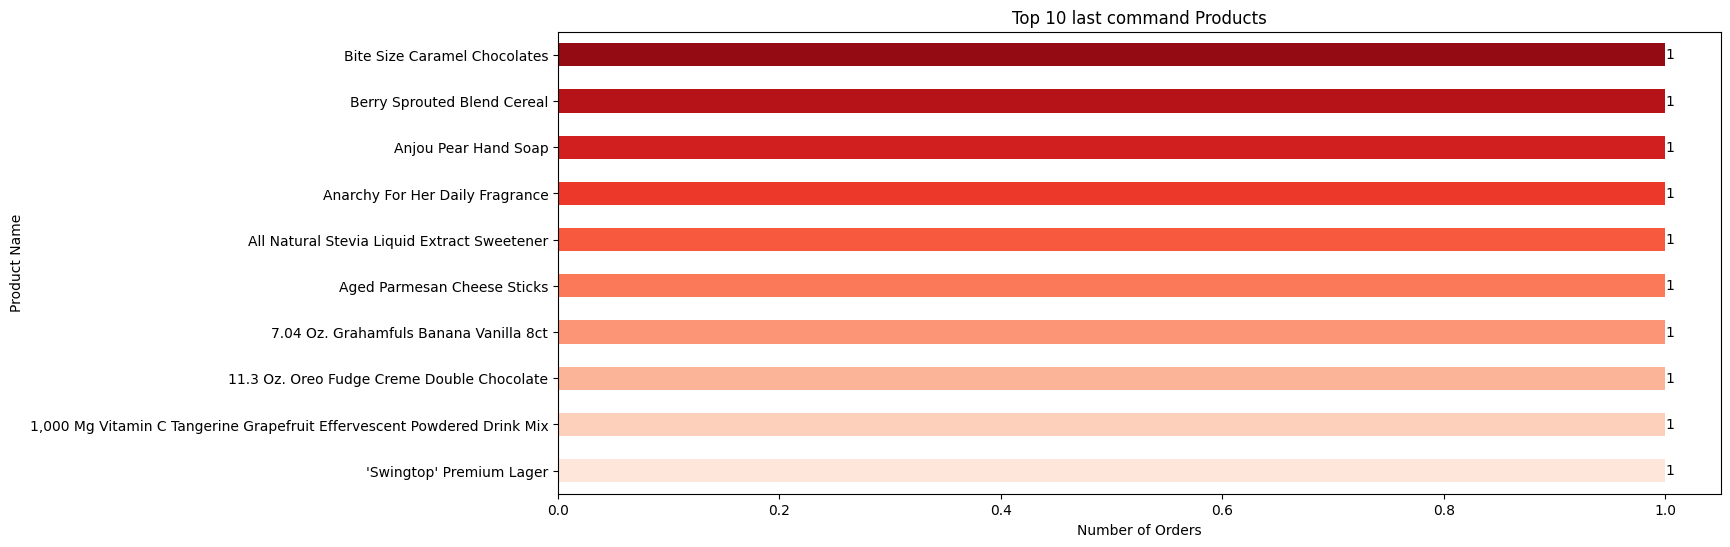

In [47]:
#top 5 products
last_sell_product = final.groupby('product_name')['order_id'].count().nsmallest(10)

#barhchat
plt.figure(figsize=(15, 6))
bars = last_sell_product.plot(kind='barh', color=sns.color_palette('Reds', len(last_sell_product)))
plt.title('Top 10 last command Products')
plt.xlabel('Number of Orders')  
plt.ylabel('Product Name')

#labels
for bar in bars.patches:
    xval = bar.get_width() 
    plt.text(xval, bar.get_y() + bar.get_height()/2, round(xval, 0), ha='left', va='center') 
plt.show()

**top 7 department with most command products**

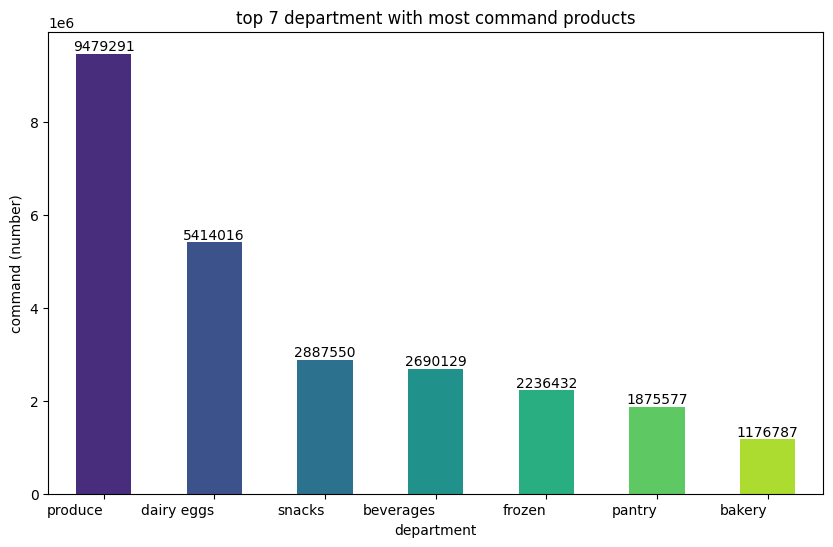

In [48]:
#command by department
order_by_department = final.groupby('department')['order_id'].count()

top_5_department = order_by_department.nlargest(7)

#barchat
plt.figure(figsize=(10, 6))
bars = top_5_department.plot(kind='bar', color=sns.color_palette('viridis', len(top_5_department)))
plt.title('top 7 department with most command products')
plt.xlabel('department')
plt.ylabel('command (number)')
plt.xticks(rotation =0, ha='right')

#labels
for bar in bars.patches:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 0), ha='center', va='bottom')

plt.show()

`produce` est le département ayant éffectué le plus de vente et représente 35% des commandes.
il est suivie de `dairy_eggs` et `snacks`.

**the 7 lowest products command by department**

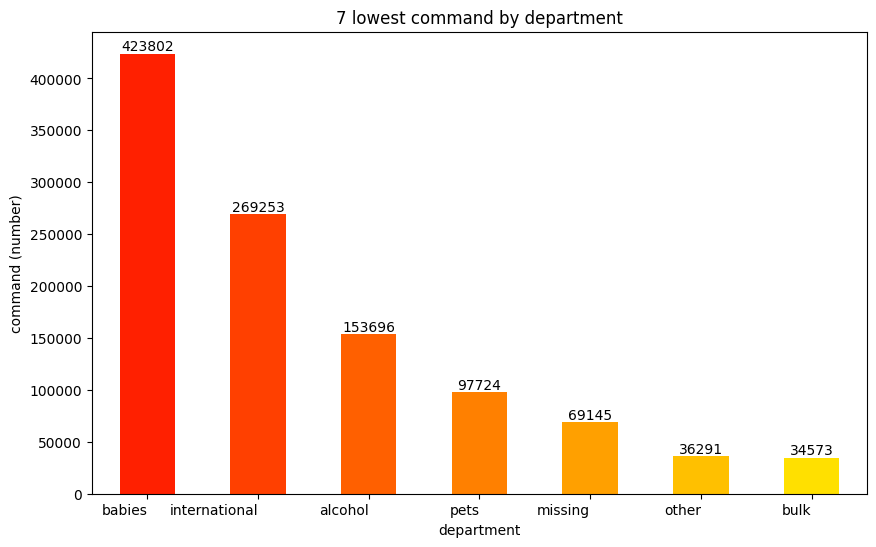

In [49]:
lastest_order_by_department = final.groupby('department')['order_id'].count().nsmallest(7)
last_7_products = lastest_order_by_department.nlargest(7)

#barchat
plt.figure(figsize=(10, 6))
bars = last_7_products.plot(kind='bar', color=sns.color_palette('autumn', len(last_7_products)))
plt.title('7 lowest command by department')
plt.xlabel('department')
plt.ylabel('command (number)')
plt.xticks(rotation =0, ha='right')  

#labels
for bar in bars.patches:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 0), ha='center', va='bottom')

plt.show()

`bulk` is at the bottom of the list in terms of number of orders.

**top 7 total products command for aisle**

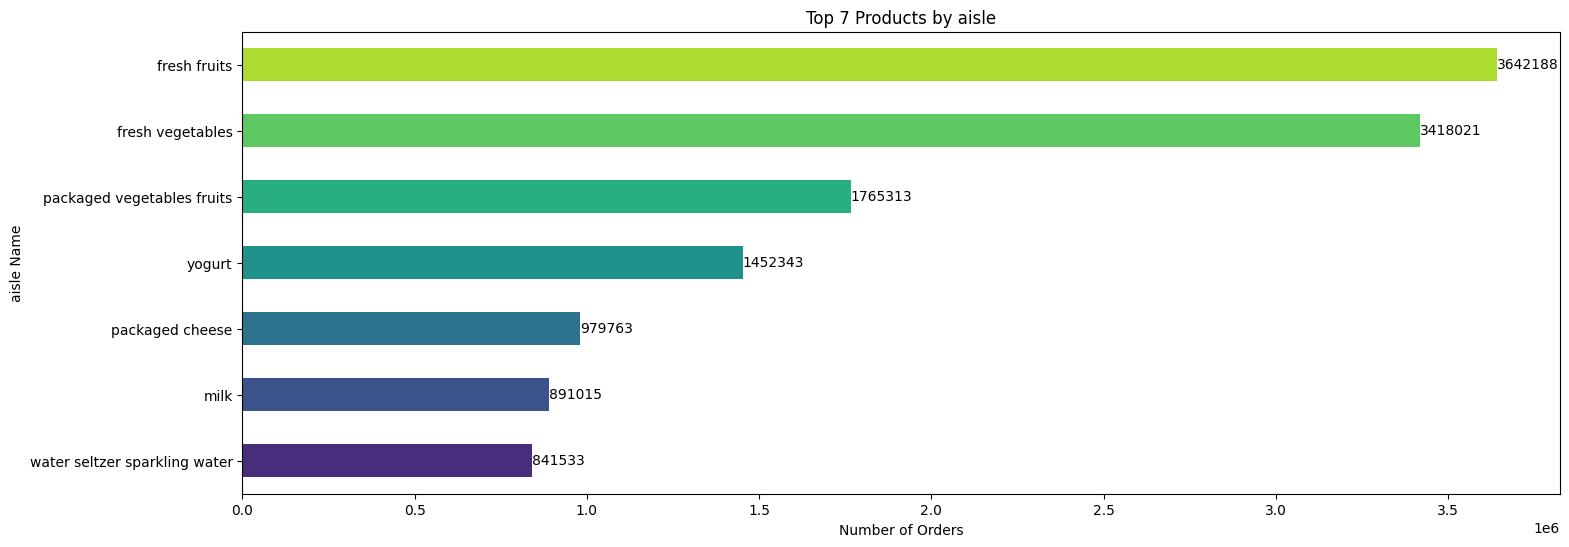

In [50]:
#top 5 products
top5_aisale = final.groupby('aisle')['order_id'].count().nlargest(7)
top5_aiseless = top5_aisale.nsmallest(7)

#barhchat
plt.figure(figsize=(17, 6))
bars = top5_aiseless.plot(kind='barh', color=sns.color_palette('viridis', len(top5_aiseless))) 
plt.title('Top 7 Products by aisle')
plt.xlabel('Number of Orders')  
plt.ylabel('aisle Name')

#labels
for bar in bars.patches:
    xval = bar.get_width() 
    plt.text(xval, bar.get_y() + bar.get_height()/2, round(xval, 0), ha='left', va='center') 
plt.show()

`fresh fruits` and `fresh vegetables` are the most ordered products, accounting for over 20% of aisle orders.

**the last 7 total products command for aisle**

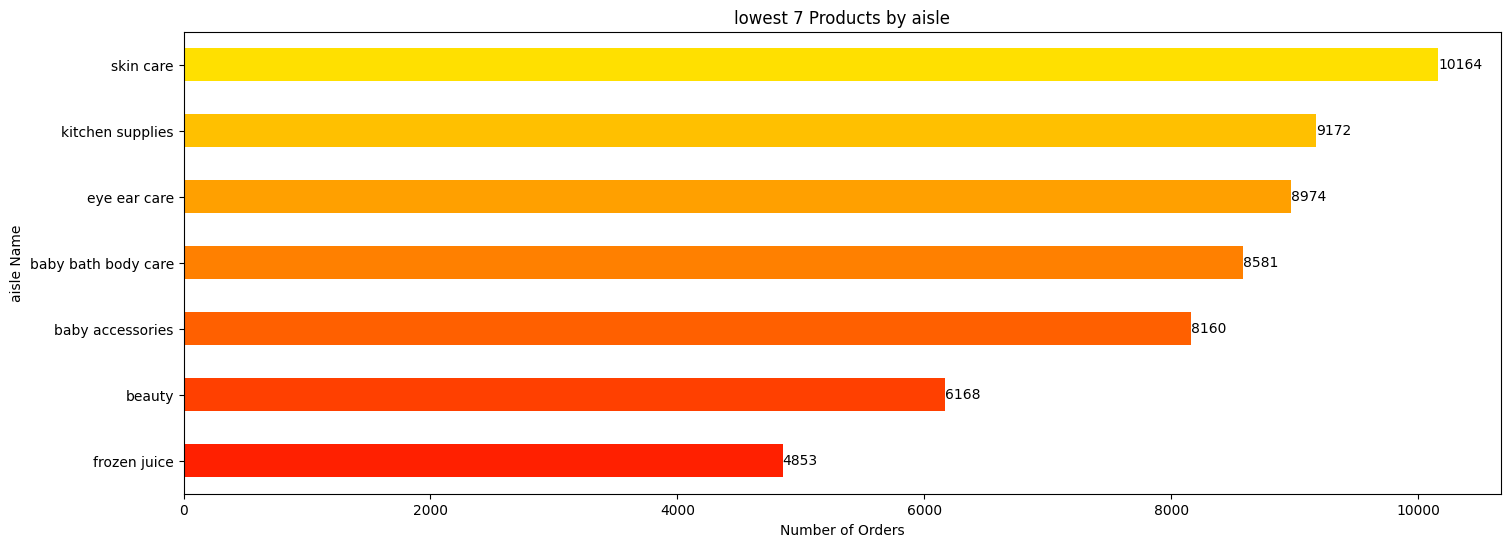

In [51]:
#top 5 products
lowest5_aisale = final.groupby('aisle')['order_id'].count().nsmallest(7)
top_lowest = lowest5_aisale.nsmallest(7)

#barhchat
plt.figure(figsize=(17, 6))
bars = top_lowest.plot(kind='barh', color=sns.color_palette('autumn', len(top_lowest))) 
plt.title('lowest 7 Products by aisle')
plt.xlabel('Number of Orders')  
plt.ylabel('aisle Name')

#labels
for bar in bars.patches:
    xval = bar.get_width() 
    plt.text(xval, bar.get_y() + bar.get_height()/2, round(xval, 0), ha='left', va='center') 
plt.show()

`Frozen juice` and `beauty` are the aisles with the fewest orders.

**the top 5 products for top 3 aisles command**

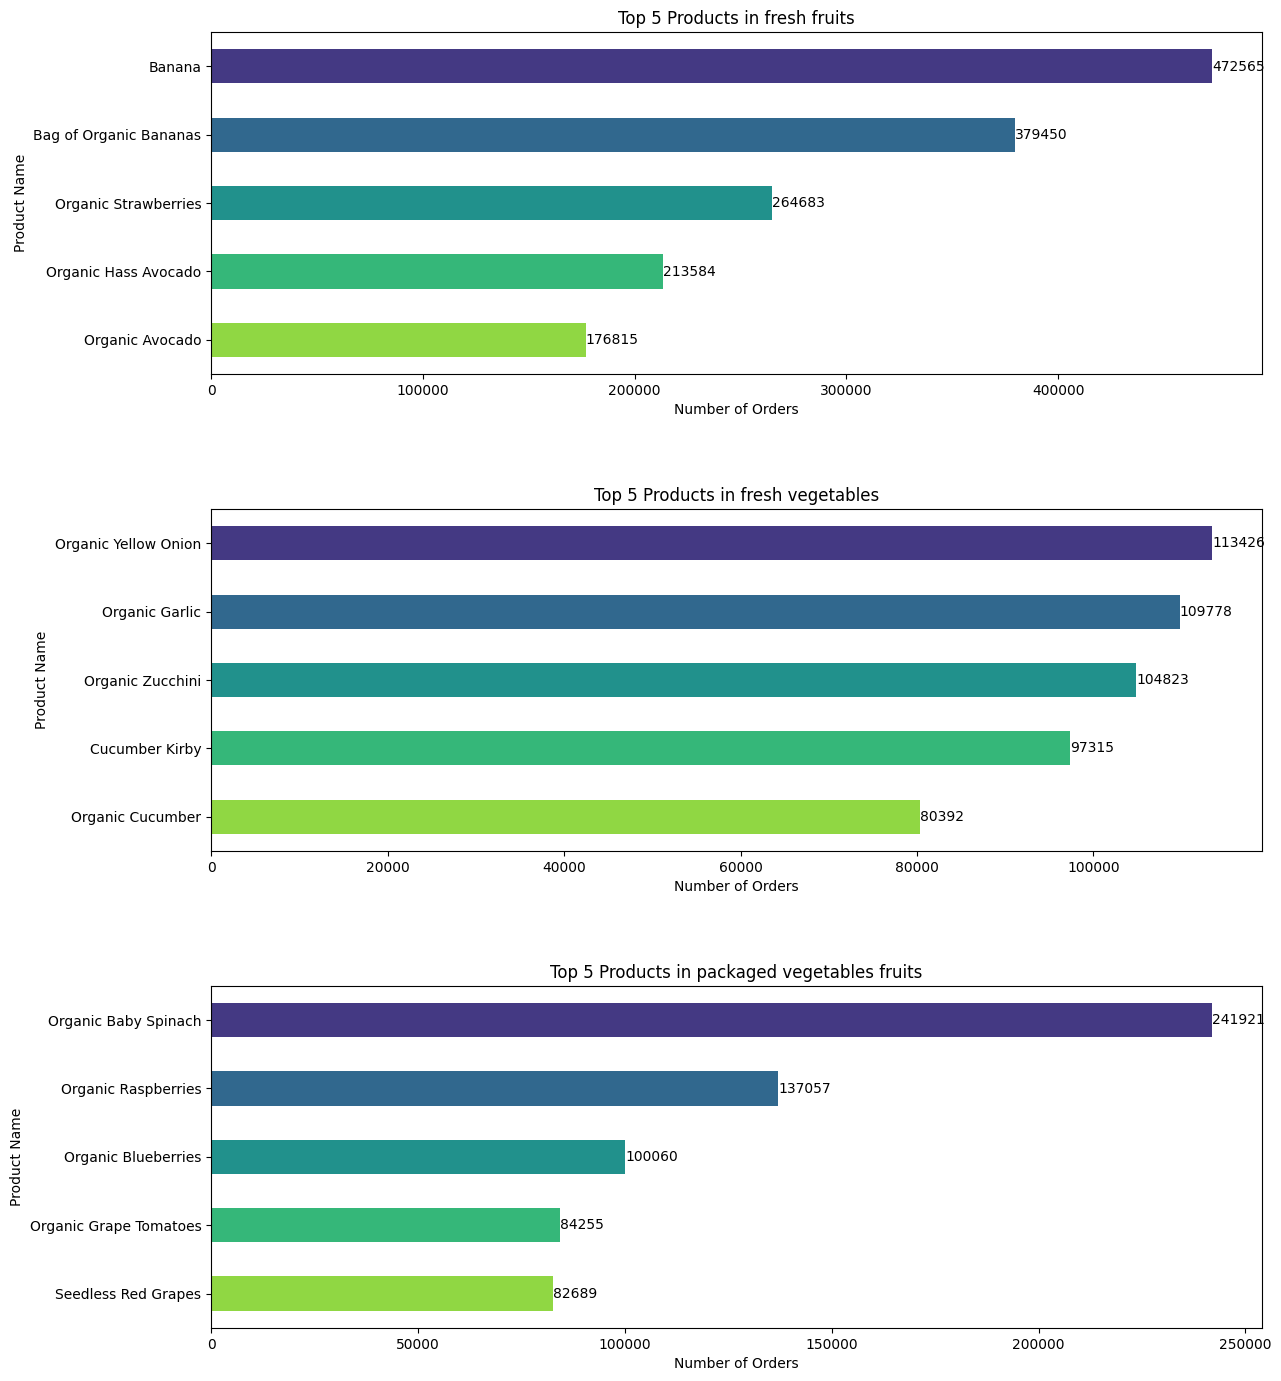

In [52]:
#top 3 aisle by department command
top_3_aisles = final['aisle'].value_counts().nlargest(3).index

#subplot barhchat
fig, axes = plt.subplots(3, 1, figsize=(14, 15))  
for i, aisle in enumerate(top_3_aisles):
    aisle_data = final[final['aisle'] == aisle]
    
    top_5_products = aisle_data.groupby('product_name')['order_id'].count().nlargest(5)
    bars = top_5_products.plot(kind='barh', ax=axes[i], color=sns.color_palette('viridis', len(top_5_products))) 

    axes[i].set_title(f'Top 5 Products in {aisle}') 
    axes[i].set_xlabel('Number of Orders')
    axes[i].set_ylabel('Product Name')
    axes[i].invert_yaxis()
    
    #labels
    for bar in bars.patches:
        xval = bar.get_width()
        axes[i].text(xval, bar.get_y() + bar.get_height()/2, round(xval, 0), ha='left', va='center')

plt.tight_layout(pad=5) 
plt.show()

overall, organic products are the most ordered by users.

#### <h3><center><b><font color='green'>How often do people order the same items again ?</font></b></center></h3>

In [53]:
# pourcentage de produit recomm ndé 
reordered_counts = final['reordered'].value_counts()
reordered_counts

reordered
yes    19126536
no     13307953
Name: count, dtype: int64

In [54]:
#ratio reordered product

reordered_counts[0] / reordered_counts[1]


C:\Users\lamif\AppData\Local\Temp\ipykernel_10904\1167885814.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  reordered_counts[0] / reordered_counts[1]


np.float64(1.4372259956132998)

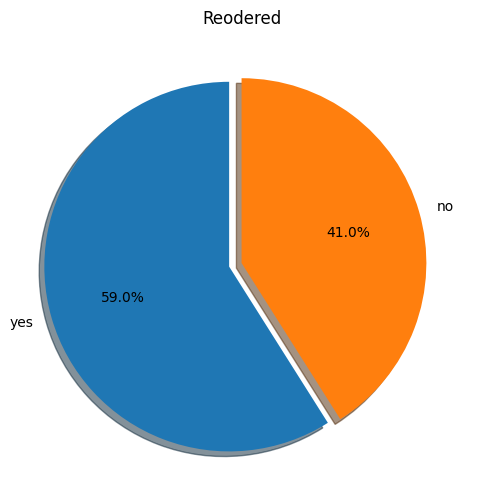

In [55]:
# pourcentage de produit recomm ndé 
reordered_counts = final['reordered'].value_counts()

# pie chart
explode = (0.07, 0.0)
plt.figure(figsize=(6, 6))
plt.pie(reordered_counts, labels=reordered_counts.index, autopct=lambda p: f'{p:.1f}%', shadow=True, startangle=90, explode=explode)
plt.title('Reodered')

plt.show()

more than half of all orders have already been pre-ordered by customers

**the top 5 reordered products**

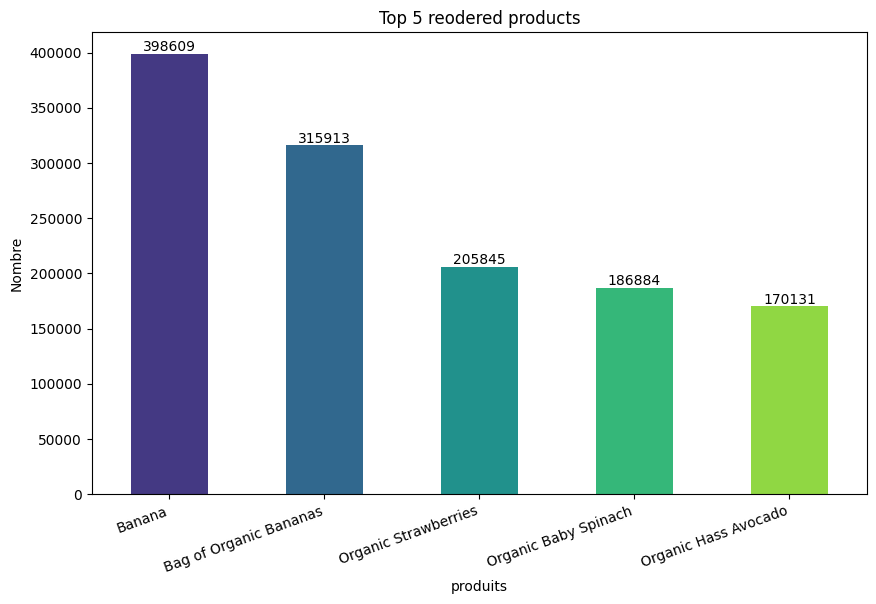

In [56]:
#5 produits les plus recommandés
reordered_data = final[final['reordered'] == 'yes'] 
average_reordered_order_by_client = reordered_data.groupby('product_name')['order_id'].count().nlargest()

#graphique à barres
plt.figure(figsize=(10, 6))
bars = average_reordered_order_by_client.plot(kind='bar', color=sns.color_palette('viridis', len(average_reordered_order_by_client)))
plt.title('Top 5 reodered products')
plt.xlabel('produits')
plt.ylabel('Nombre')
plt.xticks(rotation = 20, ha='right')

#étiquettes
for bar in bars.patches:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 0), ha='center', va='bottom')

plt.show()

**the last 5 unreordered products**

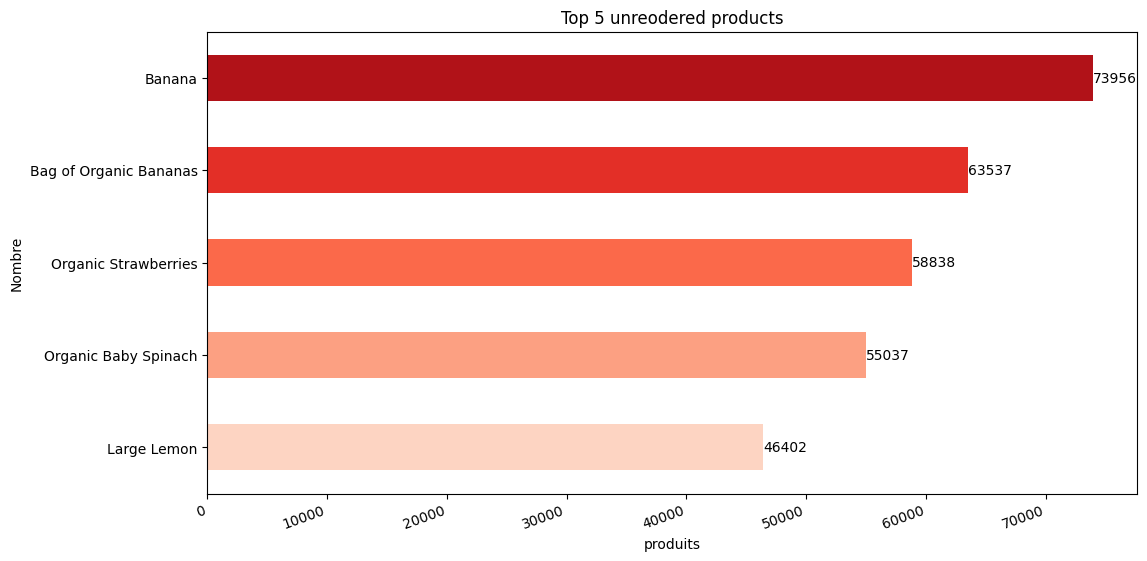

In [57]:
#5 produits les plus recommandés
reordered_data = final[final['reordered'] == 'no'] 
average_reordered_order_by_client = reordered_data.groupby('product_name')['order_id'].count().nlargest()
reordere = average_reordered_order_by_client.nsmallest()
#graphique à barres
plt.figure(figsize=(12, 6))
bars = reordere.plot(kind='barh', color=sns.color_palette('Reds', len(reordere)))
plt.title('Top 5 unreodered products')
plt.xlabel('produits')
plt.ylabel('Nombre')
plt.xticks(rotation = 20, ha='right')

#étiquettes
for bar in bars.patches:
    xval = bar.get_width() 
    plt.text(xval, bar.get_y() + bar.get_height()/2, round(xval, 0), ha='left', va='center') 
plt.show()

<h3><center><b><font color='green'> What is the ratio of orders containing organic vs not organic ?</font></b></center></h3>

In [58]:
#total products
total_products = final['product_name'].count()
print(f"total product are : {total_products}")
#produit organic
organic_products = final[final['product_name'].str.contains('Organic')].value_counts().sum()
print(f"total organic product are : {organic_products}")

#produit non organic
non_organic_products = total_products - organic_products
print(f"total no_organic product are : {non_organic_products}")

total product are : 32434489
total organic product are : 10250392
total no_organic product are : 22184097


Text(0.5, 1.0, 'Organic vs Non Organic')

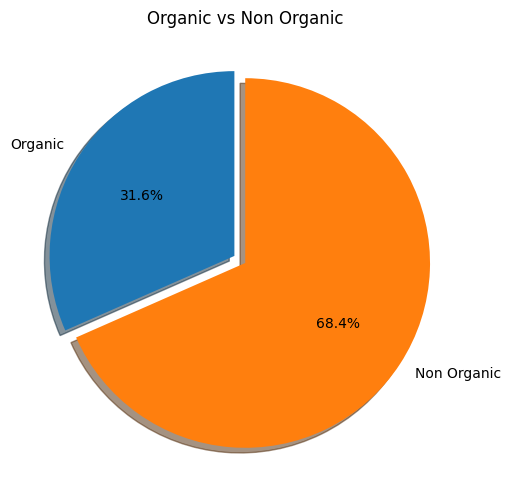

In [59]:
#pie chart with organic vs non organic

explode = (0.07, 0.0)
plt.figure(figsize=(6, 6))
plt.pie([organic_products, non_organic_products], labels=['Organic', 'Non Organic'], autopct=lambda p: f'{p:.1f}%', shadow=True, startangle=90, explode=explode)
plt.title('Organic vs Non Organic')

2/3 of all products are organic.

<h3><center><b><font color='green'>How many unique products are offered in each department/aisle ?</font></b></center></h3>

**Unique product offered by departement**

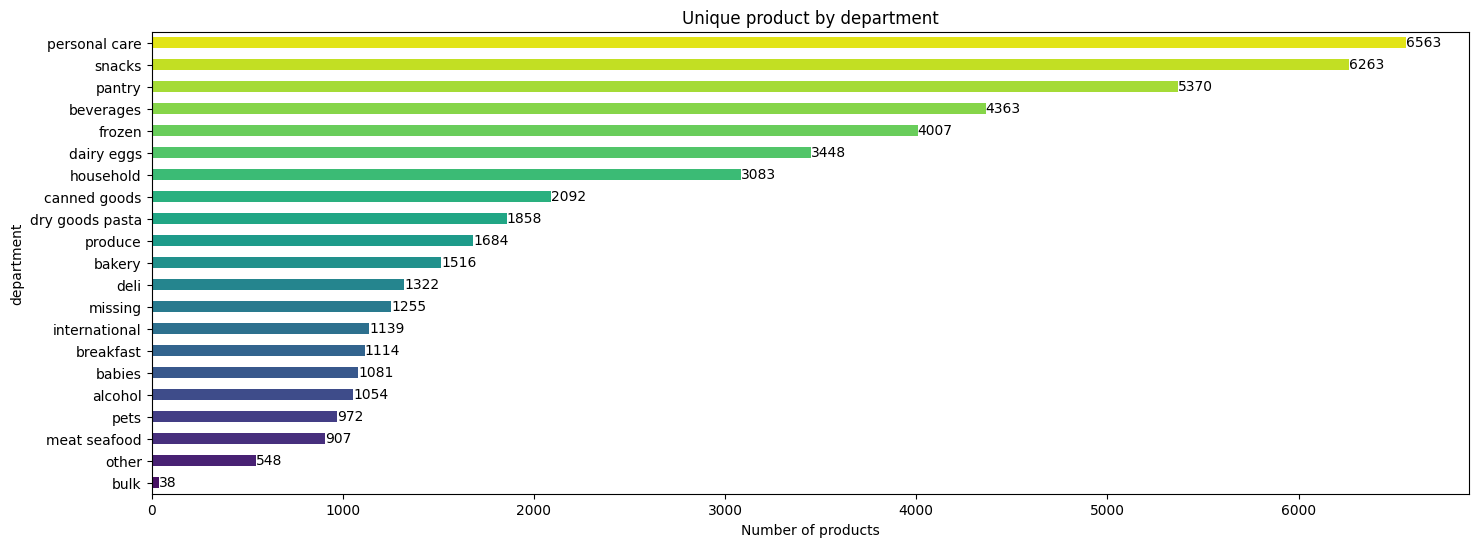

In [60]:
#top 5 products
unique_depart_products = final.groupby('department')['product_name'].nunique()
unique_largest = unique_depart_products.nsmallest(21)

#barhchat
plt.figure(figsize=(17, 6))
bars = unique_largest.plot(kind='barh', color=sns.color_palette('viridis', len(unique_largest))) 
plt.title('Unique product by department')
plt.xlabel('Number of products')  
plt.ylabel('department')

#labels
for bar in bars.patches:
    xval = bar.get_width() 
    plt.text(xval, bar.get_y() + bar.get_height()/2, round(xval, 0), ha='left', va='center') 
plt.show()

**Unique product offered by aisle**

In [61]:
#unique product by aisle
unique_product_products = final.groupby('aisle')['product_name'].nunique()
unique_product_products

aisle
air fresheners candles            354
asian foods                       605
baby accessories                   44
baby bath body care               132
baby food formula                 718
                                 ... 
trash bags liners                 112
vitamins supplements             1038
water seltzer sparkling water     344
white wines                       147
yogurt                           1026
Name: product_name, Length: 134, dtype: int64

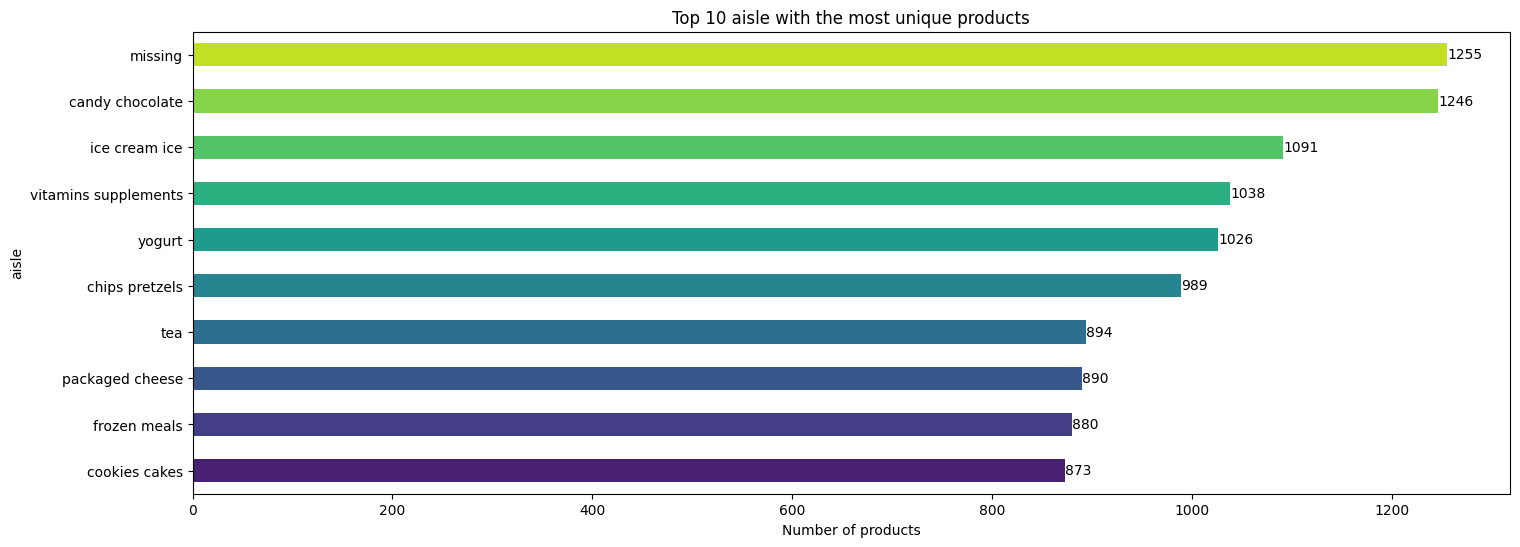

In [62]:
#top 5 products
unique_aisle_products = final.groupby('aisle')['product_name'].nunique().nlargest(10)
unique_largest = unique_aisle_products.nsmallest(21)

#barhchat
plt.figure(figsize=(17, 6))
bars = unique_largest.plot(kind='barh', color=sns.color_palette('viridis', len(unique_largest))) 
plt.title('Top 10 aisle with the most unique products')
plt.xlabel('Number of products')  
plt.ylabel('aisle')

#labels
for bar in bars.patches:
    xval = bar.get_width() 
    plt.text(xval, bar.get_y() + bar.get_height()/2, round(xval, 0), ha='left', va='center') 
plt.show()

<h3><center><b><font color='green'>Is there an association between time of last order and probability of reorder ?</font></b></center></h3>

In [63]:
final.head()

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,day,period,product_name,aisle_id,department_id,aisle,department
0,2,33120,1,yes,202279,prior,3,5,9,8.0,Saturday,Morning,Organic Egg Whites,86,16,eggs,dairy eggs
1,2,28985,2,yes,202279,prior,3,5,9,8.0,Saturday,Morning,Michigan Organic Kale,83,4,fresh vegetables,produce
2,2,9327,3,no,202279,prior,3,5,9,8.0,Saturday,Morning,Garlic Powder,104,13,spices seasonings,pantry
3,2,45918,4,yes,202279,prior,3,5,9,8.0,Saturday,Morning,Coconut Butter,19,13,oils vinegars,pantry
4,2,30035,5,no,202279,prior,3,5,9,8.0,Saturday,Morning,Natural Sweetener,17,13,baking ingredients,pantry


In [64]:
# reordered_product = final['reordered'].replace({'yes': 1, 'no': 0})

# #reod = reordered_prod where = 1

# days = final['days_since_prior_order'].astype(int)

# #yes==0 and no==1 for reordered
# orders_products['reordered'] = orders_products['reordered'].replace({1: 'yes', 0: 'no'})
# orders_products.head()

<h3><center><b><font color='green'>which are the 5 departments with the highest demand?</font></b></center></h3>

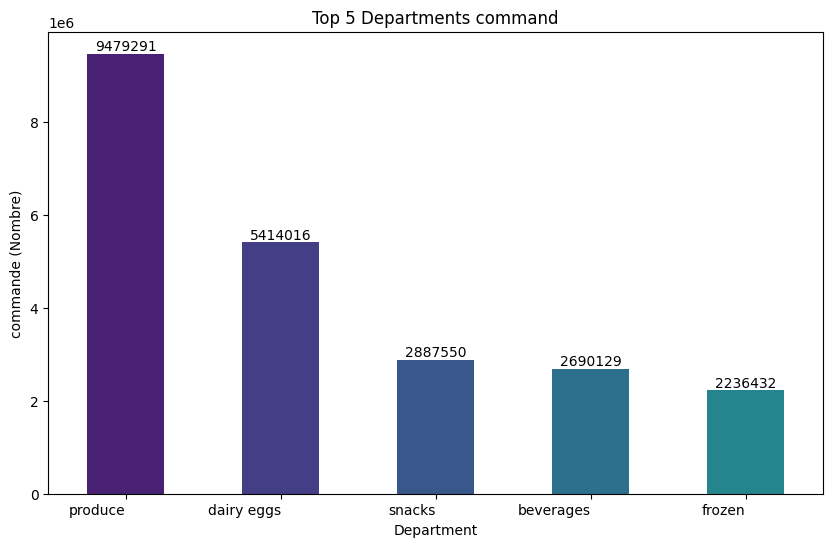

In [65]:
#department command
department_orders = final['department'].value_counts()

#Top 5 departments
top_5_departments = department_orders.head(5)

#barchat
plt.figure(figsize=(10, 6))
bars = top_5_departments.plot(kind='bar', color=sns.color_palette('viridis', len(most_sell_product)))
plt.title('Top 5 Departments command')
plt.xlabel('Department')
plt.ylabel('commande (Nombre)')
plt.xticks(rotation = 0, ha='right')  

#labels
for bar in bars.patches:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 0), ha='center', va='bottom')

plt.show()

`produce` est le département ayant le plus de commande (28%)

In [66]:
final.head()

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,day,period,product_name,aisle_id,department_id,aisle,department
0,2,33120,1,yes,202279,prior,3,5,9,8.0,Saturday,Morning,Organic Egg Whites,86,16,eggs,dairy eggs
1,2,28985,2,yes,202279,prior,3,5,9,8.0,Saturday,Morning,Michigan Organic Kale,83,4,fresh vegetables,produce
2,2,9327,3,no,202279,prior,3,5,9,8.0,Saturday,Morning,Garlic Powder,104,13,spices seasonings,pantry
3,2,45918,4,yes,202279,prior,3,5,9,8.0,Saturday,Morning,Coconut Butter,19,13,oils vinegars,pantry
4,2,30035,5,no,202279,prior,3,5,9,8.0,Saturday,Morning,Natural Sweetener,17,13,baking ingredients,pantry


<h3><center><b><font color='green'> How many items do people buy ?</font></b></center></h3>

**min command**

In [67]:
#total order by user_id
min_orders = final.groupby('user_id')['order_number'].min().nsmallest(1)
min_orders

user_id
1    1
Name: order_number, dtype: int64

**max command**

In [68]:
#total order by user_id
max_orders = final.groupby('user_id')['order_number'].max().nlargest(1)
max_orders

user_id
210    99
Name: order_number, dtype: int64

In [69]:
#total user with max command (99)
total_orders = final.groupby('user_id')['order_number'].max()
order_99 = (total_orders == 99).value_counts()
order_99

order_number
False    204835
True       1374
Name: count, dtype: int64

**user who ordered the most unique items**

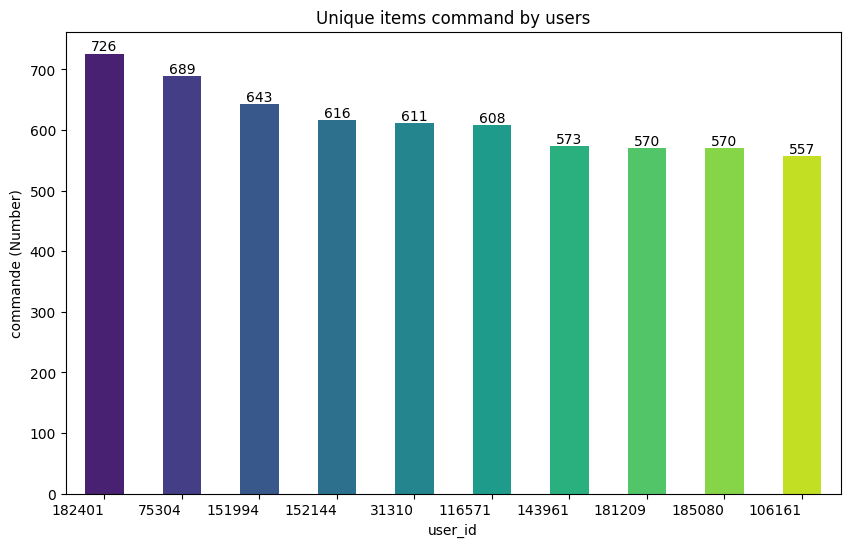

In [70]:
#total unique product command
unique_command = final.groupby('user_id')['product_name'].nunique().nlargest(10)


#barchat
plt.figure(figsize=(10, 6))
bars = unique_command.plot(kind='bar', color=sns.color_palette('viridis', len(unique_command)))
plt.title('Unique items command by users')
plt.xlabel('user_id')
plt.ylabel('commande (Number)')
plt.xticks(rotation = 0, ha='right')  

#labels
for bar in bars.patches:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 0), ha='center', va='bottom')

plt.show()

**user who ordered the most items**

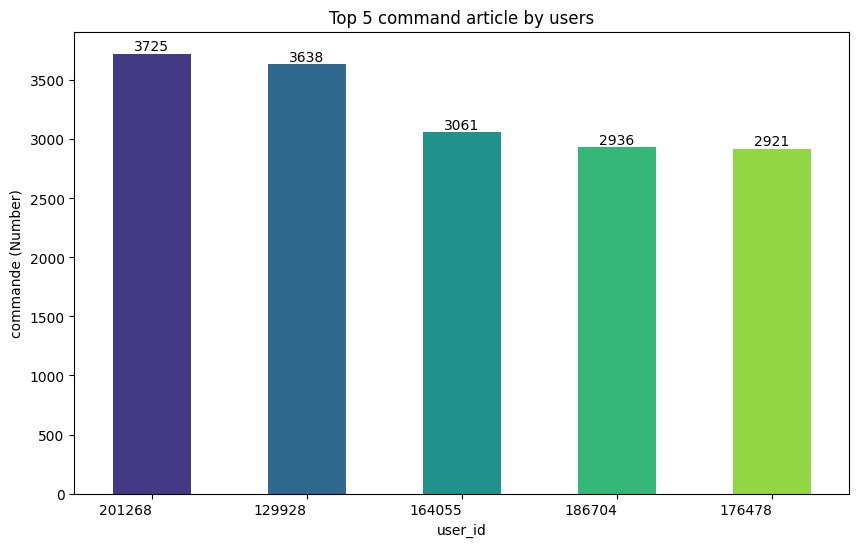

In [71]:
#total article
total_article = final.groupby('user_id')['product_name'].count().nlargest()


#barchat
plt.figure(figsize=(10, 6))
bars = total_article.plot(kind='bar', color=sns.color_palette('viridis', len(total_article)))
plt.title('Top 5 command article by users')
plt.xlabel('user_id')
plt.ylabel('commande (Number)')
plt.xticks(rotation = 0, ha='right')  

#labels
for bar in bars.patches:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 0), ha='center', va='bottom')

plt.show()